<a href="https://colab.research.google.com/github/KapilNarayanSingh/Appliance-Energy-Prediction/blob/main/Appliance_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Appliance Energy Prediction**
##**Project Type - Regression**
##**Contribution**- Team
Team Member 1- Kapil Narayan Singh

Team Member 2- Sudhanshu Chouhan

#**Project Summary**
In this project we are going to predict the energy usage of appliance.The data that we have been provided has a data set is of 10 min for about 4.5 months.Data has been made up by monitoring House temprature and Humidity condition by a Zigbee wireless sensor network.Each wireless node transmitted the temprature and Humidity condition for 3.3 minute and the wirelss Data was averaged for 10 minutes.The energy data was logged every 10 minutes with m-bus energy metres.Weather from the nearest airport station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis(rp5.ru) and merged together with experimental data set using Date and time coloumn.In this Data set there are two variables that has been included for testing the regression models and to filter out non- predictive attributes.  

#**Let's Begin!**

##**Know Your Data**

In [17]:
###Downloading all the library required for the project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import missingno as mno #install running pip install missingno on cmd if using PYPI directly or conda install -c conda-forge missingno -if using anaconda)\
import plotly.offline as py #Package for data visulization
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from  sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
raw_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data science/module 1/data_application_energy.csv")

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
raw_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
#Duplicate value
raw_data.duplicated().sum()

0

In [9]:
raw_data.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

##There are no missing values in the data as wells no duplicate values.From the data we get to know that there are 29 coloumn of which 26 are of float type,2 are of integer type and only one is of object type. 

#**Describing Variables**

In [10]:
raw_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [11]:
pd.value_counts('raw_data')

raw_data    8
dtype: int64

##**Checking Unique Values for each variables**

In [12]:
raw_data.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

# 3. **Data Wrangling**

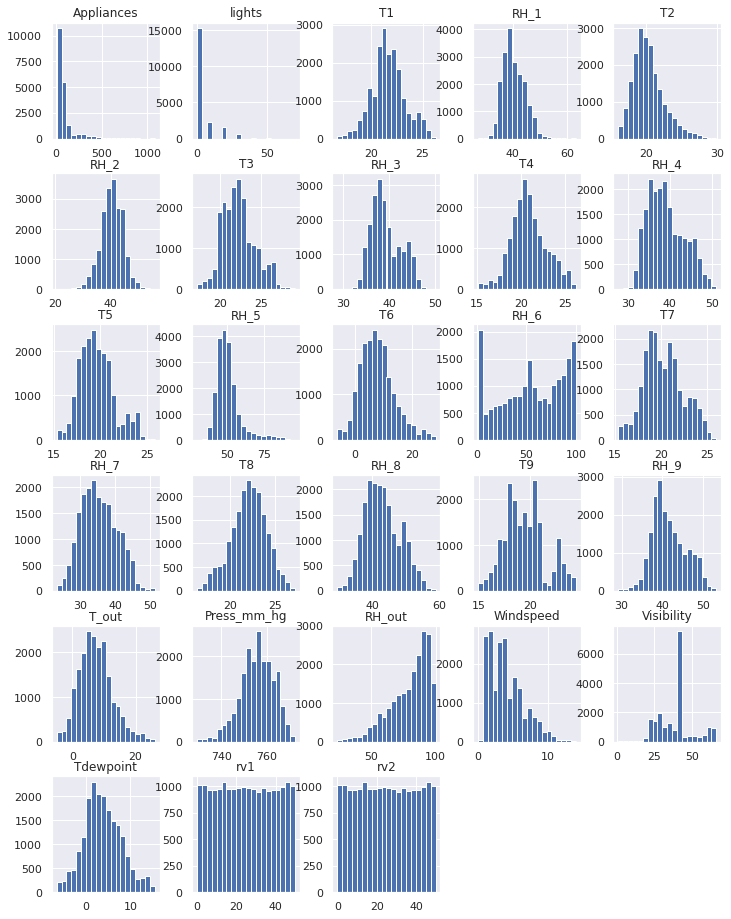

In [13]:
# Histogram of all the features to understand the distribution
raw_data.hist(bins = 20 , figsize= (12,16)) ;

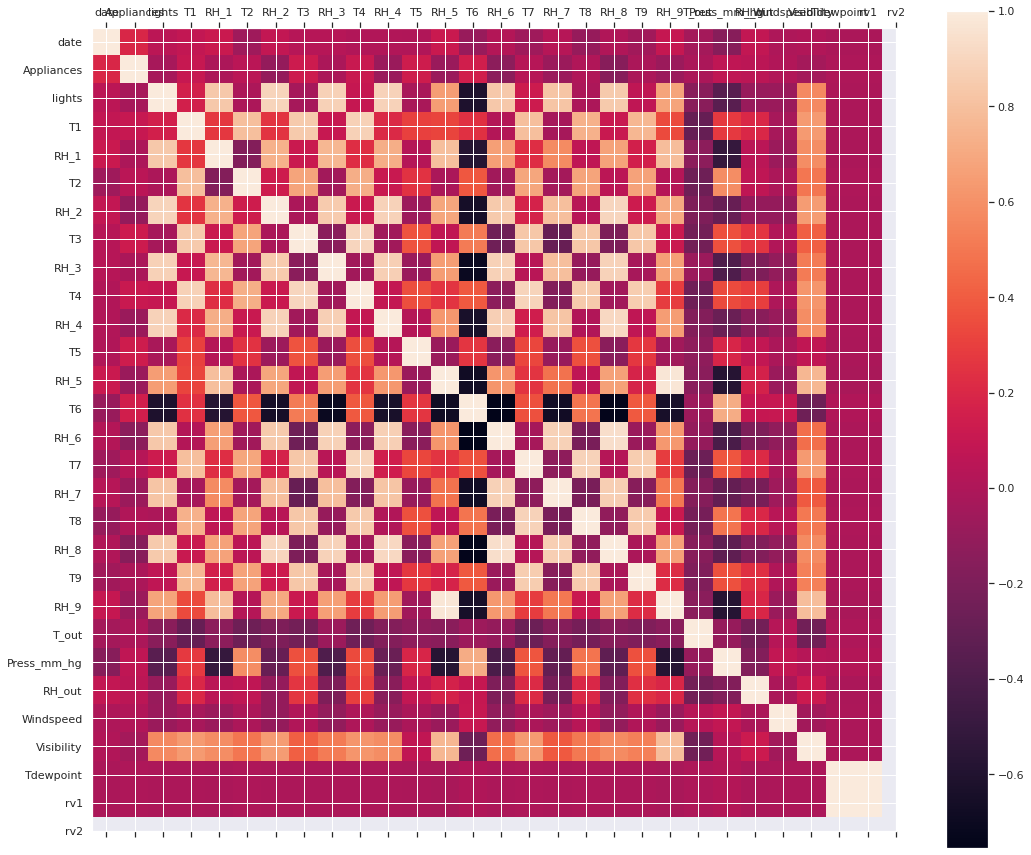

In [17]:
#  Plot correlation matrix
plt.figure(figsize=(18, 15))
plt.matshow(raw_data.corr(), fignum = 1)
plt.xticks(range(len(raw_data.columns)), raw_data.columns)
plt.yticks(range(len(raw_data.columns)), raw_data.columns)
plt.colorbar()
plt.show()

#Logistic regression for Feature selection

In [18]:
from sklearn.linear_model import LogisticRegression

# convert datetime to the seconds from 1970-01-01 00:00:00 and store it in column 'ts'
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['ts'] = raw_data.date.values.astype(np.int64)
m = LogisticRegression().fit(raw_data.drop(columns=['Appliances', 'date']), raw_data['Appliances'])

# find the feature that has the greatest feature importance
raw_data.drop(columns=['Appliances', 'date']).columns[np.argmax(abs(m.coef_[0]))]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'lights'

In [19]:
# Since it is our time series model, we first convert the date column which is a string to datetime datatype and set is as the index column

raw_data = raw_data.iloc[:,0:2]
raw_data = raw_data.set_index('date')
raw_data.tail()

,Appliances
date,
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270
2016-05-27 17:50:00,420
2016-05-27 18:00:00,430


Text(0, 0.5, 'Energy usage in Wh')

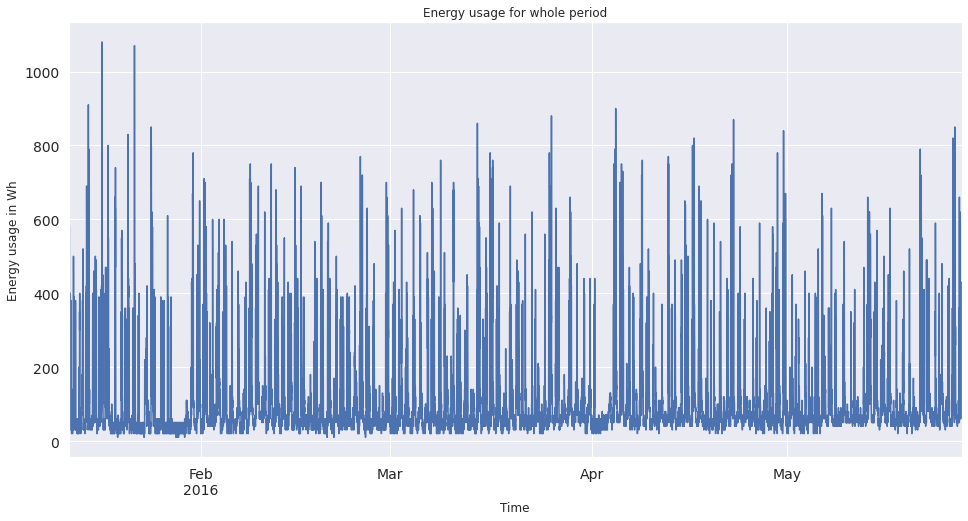

In [20]:
# Visualizing data

raw_data.index.name=None
raw_data['Appliances'].plot(figsize=(16,8), title= 'Energy usage for whole period', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Energy usage in Wh')

In [26]:

# Functions to be used from the plots
raw_data['weekday'] = raw_data.index.weekday
def daily(x,df=raw_data):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=raw_data):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=raw_data):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

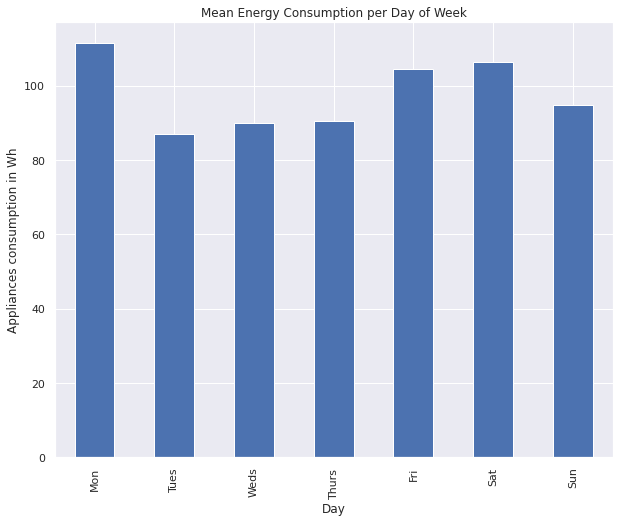

In [27]:
# Plot of Mean Energy Consumption per Day of Week

daily('Appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

This show daily mean consumption in specific daywise format of appliances

#Improve linear Regression 

In [22]:
## Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [25]:
# I took a sbupart of the data for analysis as it was giving memory error and was very slow for such large dataset
feature_vars = raw_data[col_temp + col_hum + col_weather + col_randoms] 
target_vars = raw_data[col_target]
x= feature_vars.iloc[:1200,:]
y= target_vars.iloc[:1200,:]

scaler= StandardScaler()
x=scaler.fit_transform(x)

In [28]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=0)

In [29]:
lreg= LinearRegression()
lreg.fit(x_train, y_train)
print(f'Train score for Linear regression model without using Kfold validation is: {lreg.score(x_train, y_train)}')

train_scores= cross_val_score(lreg,x_train,y_train, cv=10)
print(f'Train score for Linear regression model using 10Fold cross validation is:  {train_scores.mean()}')
test_scores= cross_val_score(lreg,x_test,y_test, cv=10)
print(f'Test score for Linear regression model using 10Fold cross validation is:  {test_scores.mean()}')

Train score for Linear regression model without using Kfold validation is: 0.23037974417312734
Train score for Linear regression model using 10Fold cross validation is:  0.15775573814385285
Test score for Linear regression model using 10Fold cross validation is:  0.017950015930807084


In [31]:
mse= cross_val_score(lreg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(f'RMSE for Linear regression model using 10Fold cross validation is: {mse.mean()}')

RMSE for Linear regression model using 10Fold cross validation is: -14436.575039795378


In [33]:
compiled= pd.DataFrame(columns= ['Regressor', 'Avg_Train_Score', 'Avg_Test_Score', 'RMSE_Best_Param', 'Best_Hyperparameters'])

In [34]:
compiled=compiled.append({'Regressor': 'LinearRegression', 'Avg_Train_Score': train_scores.mean(), 
                          'Avg_Test_Score': test_scores.mean(), 'RMSE_Best_Param': mse.mean(), 
                          'Best_Hyperparameters': "N/A"}, ignore_index=True)